In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/crude-oil-prices/Crude Oil Prices Daily.xlsx


In [105]:
#df=pd.read_csv("../input/crude-oil-prices/Crude Oil Prices Daily.xlsx",encoding='utf-8')

from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('../input/crude-oil-prices/Crude Oil Prices Daily.xlsx')

In [106]:
df.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
Date             8223 non-null datetime64[ns]
Closing Value    8216 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


In [108]:
df.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


(array([   0,    1,    2, ..., 8220, 8221, 8222]),
 <a list of 8223 Text major ticklabel objects>)

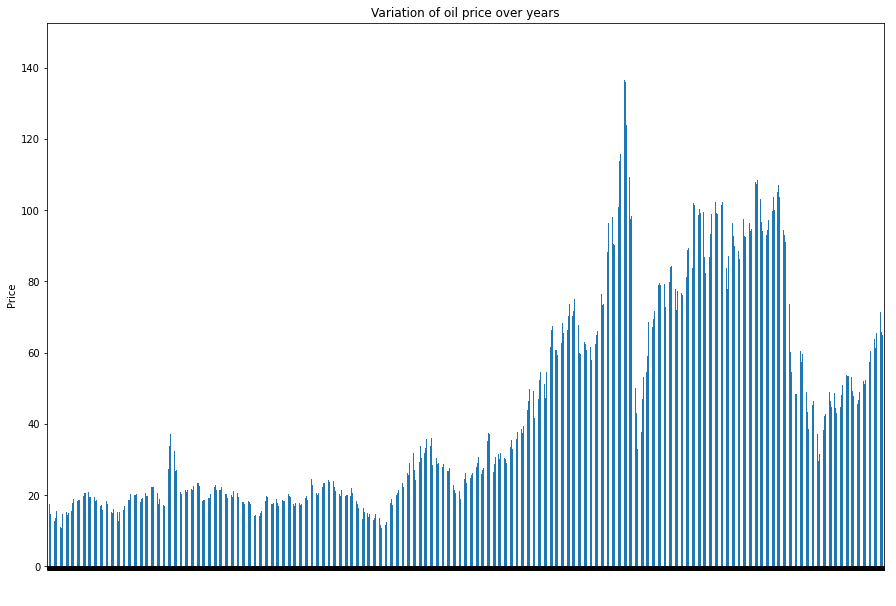

In [109]:
plt.figure(figsize=(15,10))
df['Closing Value'].plot(kind='bar')
plt.title('Variation of oil price over years')
plt.ylabel('Price')
plt.xticks(color = 'w',rotation=90)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]),
 <a list of 10 Text major ticklabel objects>)

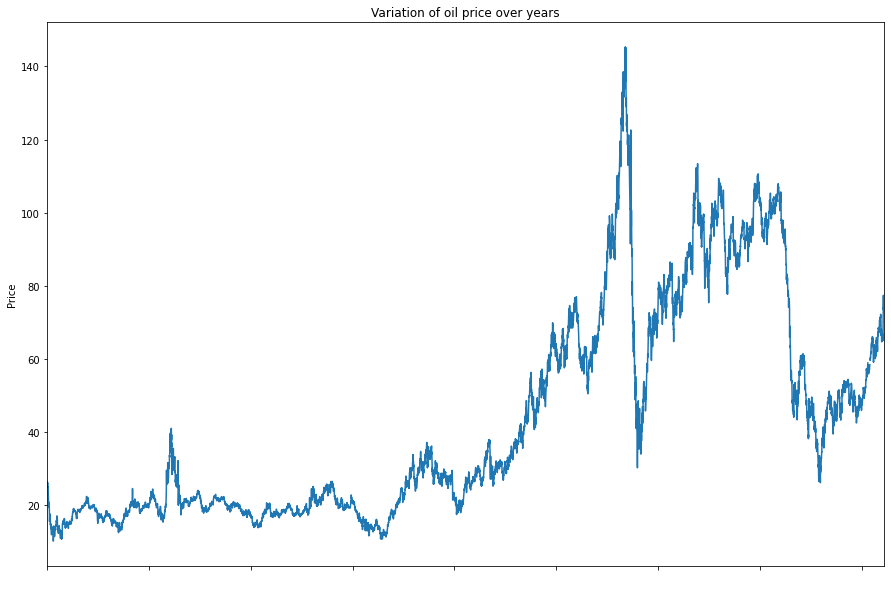

In [110]:
plt.figure(figsize=(15,10))
df['Closing Value'].plot(kind='line')
plt.title('Variation of oil price over years')
plt.ylabel('Price')
plt.xticks(color = 'w')


In [111]:
df['year']=df['Date'].dt.year

In [112]:
df.head()

,Date,Closing Value,year
0,1986-01-02,25.56,1986
1,1986-01-03,26.00,1986
2,1986-01-06,26.53,1986
3,1986-01-07,25.85,1986
4,1986-01-08,25.87,1986


Text(0, 0.5, 'Price in $')

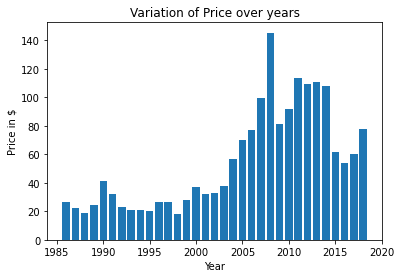

In [113]:
x=df['year']
y=df['Closing Value']
plt.bar(x,y)
plt.title('Variation of Price over years')
plt.xlabel('Year')
plt.ylabel('Price in $')

In [114]:
df.tail()    # there are some null(NaN) values appearing the data

,Date,Closing Value,year
8218,2018-07-03,74.19,2018
8219,2018-07-04,NaN,2018
8220,2018-07-05,73.05,2018
8221,2018-07-06,73.78,2018
8222,2018-07-09,73.93,2018


In [115]:
df['year'].isnull().sum()   

0

So no need for preprocessing in year fiel

In [116]:
df['Closing Value'].isnull().sum()

7

We have to preprocess the Closing value field by filling the values in place of Nan

In [117]:
df.fillna(df['Closing Value'].mean(),inplace=True)

In [118]:
x=df['year'].values.reshape(-1,1)
y=df['Closing Value'].values.reshape(-1,1)

In [119]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [120]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
score=reg.score(xtest,ytest)
print(score)

0.5485165964914962


In [126]:
from sklearn.metrics import accuracy_score    #Oil price in 2020
ypredict=reg.predict([[2020]])    
print(ypredict)

[[86.86991874]]


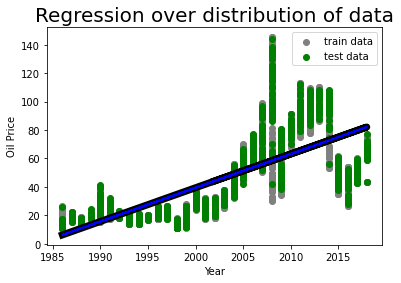

In [137]:
plt_train=plt.scatter(xtrain,ytrain,color='grey')
plt_test=plt.scatter(xtest,ytest,color='green')
plt.plot(xtrain, reg.predict(xtrain), color='black', linewidth=7)
plt.plot(xtest,reg.predict(xtest),  color='blue', linewidth=2)
plt.title('Regression over distribution of data',fontsize=20)
plt.xlabel("Year")
plt.ylabel("Oil Price")
plt.legend((plt_train, plt_test),("train data", "test data"))
plt.show()